# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parso.python.tokenize import group
from scipy.stats import ttest_ind, mannwhitneyu
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

importando o dataframe

In [34]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


imprimindo as colunas

In [5]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

agora vamos separa as tres colunas do dataframe sao elas  'renda, idade, tempo_emprego'

In [11]:
dataframe = df[['renda', 'idade', 'tempo_emprego']]
dataframe

,renda,idade,tempo_emprego
0,3369.24,36,3.575342
1,6096.14,42,0.860274
2,5658.98,31,8.065753
3,7246.69,50,1.208219
4,4017.37,52,13.873973
...,...,...,...
14995,1193.29,37,2.046575
14996,2519.18,30,12.079452
14997,1586.85,40,2.161644
14998,6975.39,47,3.295890


Contagem de variáveis qualitativas ao longo do tempo

In [35]:
dataframe_grouped = dataframe.groupby(["idade", "tempo_emprego"]).size().reset_index(name="frequência")

<Axes: xlabel='idade', ylabel='renda'>

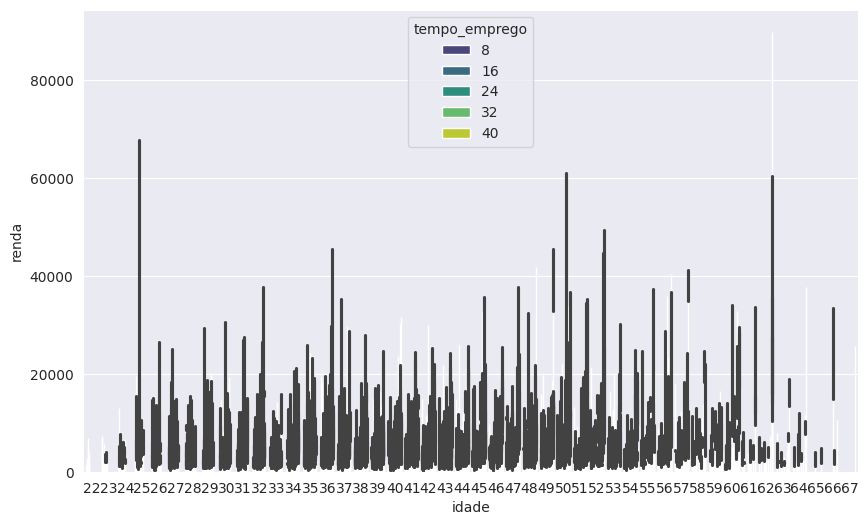

In [16]:
# Gráfico de barras agrupado
# imprimindo o grafico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_grouped,
    x="idade",
    y="renda",
    hue="tempo_emprego",  # Diferentes categorias qualitativas
    palette="viridis"
)

pois bem no grafico acima podemos ver que pessoas que tem renda percapta acima de 20000 tendem a fica mais
tempo no emprego ^^

/tmp/ipykernel_55321/1134263353.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="tempo_emprego", fontsize=10)


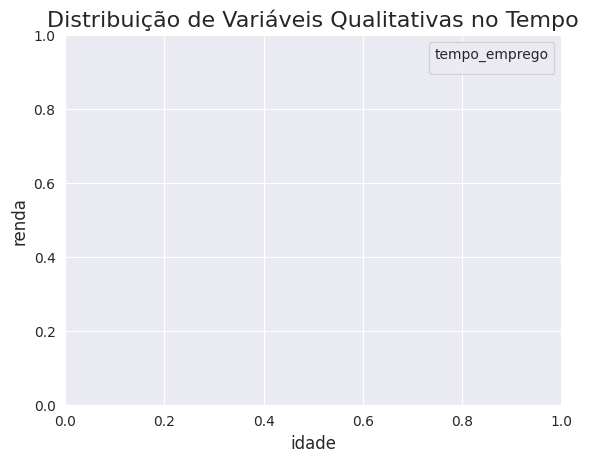

In [17]:
# Título e ajustes
plt.title("Distribuição de Variáveis Qualitativas no Tempo", fontsize=16)
plt.xlabel("idade", fontsize=12)
plt.ylabel("renda", fontsize=12)
plt.legend(title="tempo_emprego", fontsize=10)
plt.show()

.02) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [36]:
dataframe.columns

Index(['renda', 'idade', 'tempo_emprego'], dtype='object')

In [37]:
# Calculando médias por 'tempo' e 'categoria'
dataframe_grouped = dataframe.groupby(["tempo_emprego", "idade"]).agg({"renda": "mean"}).reset_index()

<Axes: xlabel='tempo_emprego', ylabel='renda'>

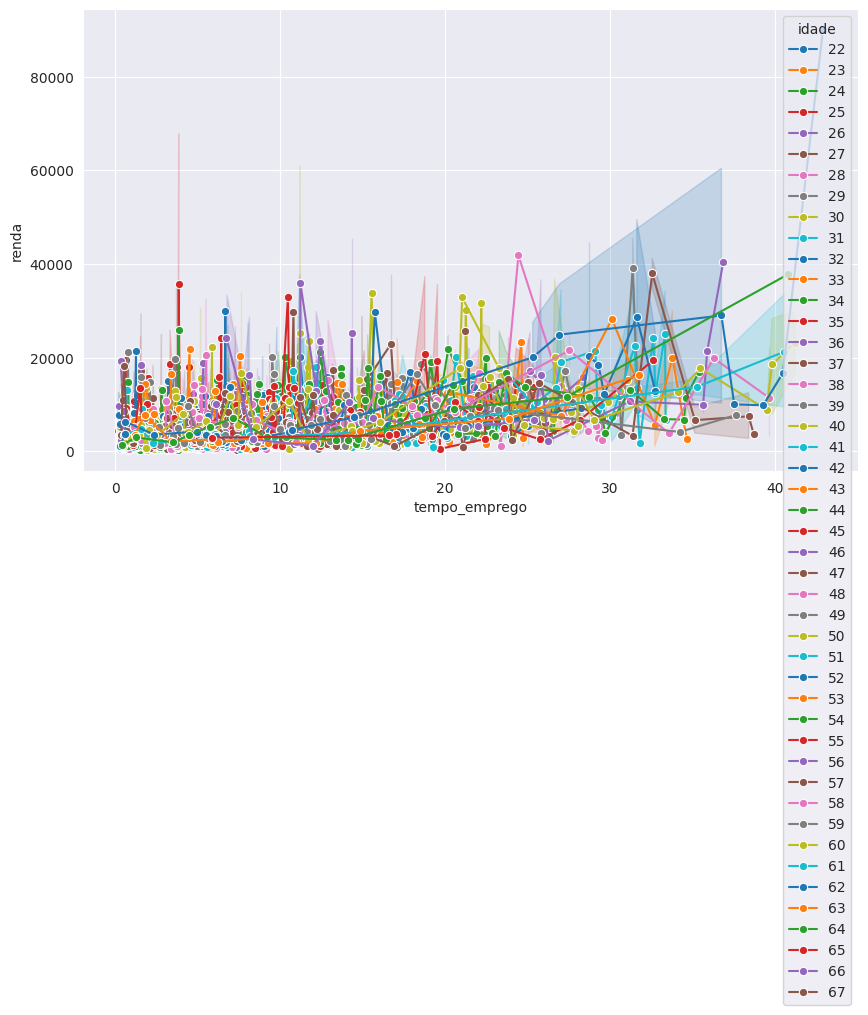

In [38]:
# Gráfico mostrando médias ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="tempo_emprego",
    y="renda",
    hue="idade",
    marker="o",
    palette="tab10"
)

no grafico assima mostra a dispensao pelo tempo de enprego com 35 anos ou mais
ja na variavel renda isso tempo de emprego nao faz difenca si vai fica muas pessoa nao fica mais nos emprego ou sao dispensada do seu trabalho pelo tempo de servico
ito tempo ou nao ^^

/tmp/ipykernel_55321/508138407.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="idade", fontsize=10)


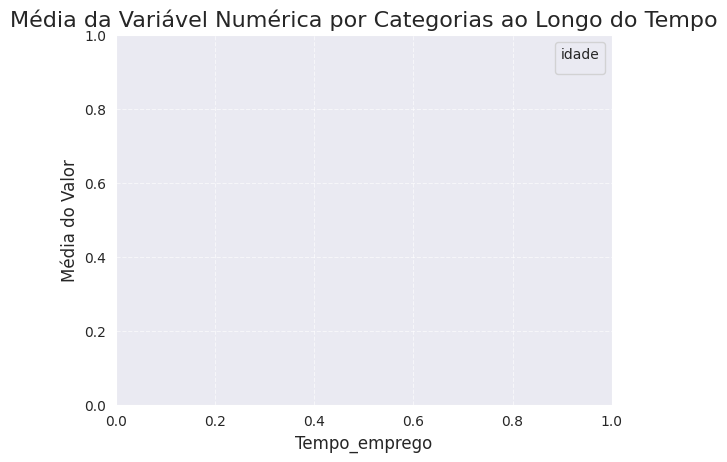

In [31]:
# Título e ajustes
plt.title("Média da Variável Numérica por Categorias ao Longo do Tempo", fontsize=16)
plt.xlabel("Tempo_emprego", fontsize=12)
plt.ylabel("Média do Valor", fontsize=12)
plt.legend(title="idade", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()